In [2]:
import zipfile,os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# melakukan ekstraksi pada file zip
import zipfile,os,shutil
local_zip = 'drive/My Drive/MachineLearning/spam.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/spam')
zip_ref.close()

In [4]:
os.listdir('/spam')

['spam_ham_dataset.csv']

In [5]:
import pandas as pd
df = pd.read_csv('/spam/spam_ham_dataset.csv')

In [6]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [7]:
#one-hot-encoding dan membuat dataframe baru
category = pd.get_dummies(df.label)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='label_num')
df_baru = df_baru.drop(columns='label')
df_baru

,Unnamed: 0,text,ham,spam
0,605,Subject: enron methanol ; meter # : 988291\r\n...,1,0
1,2349,"Subject: hpl nom for january 9 , 2001\r\n( see...",1,0
2,3624,"Subject: neon retreat\r\nho ho ho , we ' re ar...",1,0
3,4685,"Subject: photoshop , windows , office . cheap ...",0,1
4,2030,Subject: re : indian springs\r\nthis deal is t...,1,0
...,...,...,...,...
5166,1518,Subject: put the 10 on the ft\r\nthe transport...,1,0
5167,404,Subject: 3 / 4 / 2000 and following noms\r\nhp...,1,0
5168,2933,Subject: calpine daily gas nomination\r\n>\r\n...,1,0
5169,1409,Subject: industrial worksheets for august 2000...,1,0


In [8]:
#mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array
text = df_baru['text'].values
label = df_baru[['ham', 'spam']].values

In [9]:
#split data training dan testing
from sklearn.model_selection import train_test_split
text_latih, text_test, label_latih, label_test = train_test_split(text, label, test_size=0.2)

In [10]:
#Tokenisasi
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_latih) 
tokenizer.fit_on_texts(text_test)
 
#mengonversi setiap sampel menjadi sequence
sekuens_latih = tokenizer.texts_to_sequences(text_latih)
sekuens_test = tokenizer.texts_to_sequences(text_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [11]:
#Arsitektur model dengan layer embedding
#dimensi embedding 16, dimensi input sebesar num_words
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi model telah mencapai > 95%! ")
      self.model.stop_training = True
callbacks = myCallback()

In [19]:
#training
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/30
130/130 - 47s - loss: 8.4060e-04 - accuracy: 0.9998 - val_loss: 0.0973 - val_accuracy: 0.9787
Epoch 2/30
130/130 - 44s - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0895 - val_accuracy: 0.9807
Epoch 3/30
130/130 - 44s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0858 - val_accuracy: 0.9826
Epoch 4/30
130/130 - 44s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0762 - val_accuracy: 0.9836
Epoch 5/30
130/130 - 44s - loss: 0.0041 - accuracy: 0.9985 - val_loss: 0.1864 - val_accuracy: 0.9768
Epoch 6/30
130/130 - 44s - loss: 0.0173 - accuracy: 0.9952 - val_loss: 0.1136 - val_accuracy: 0.9671
Epoch 7/30
130/130 - 44s - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.0952 - val_accuracy: 0.9778
Epoch 8/30
130/130 - 44s - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0869 - val_accuracy: 0.9787
Epoch 9/30
130/130 - 44s - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0929 - val_accuracy: 0.9787
Epoch 10/30
130/130 - 44s - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0896 - val_ac

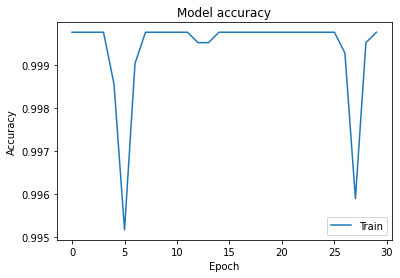

In [20]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

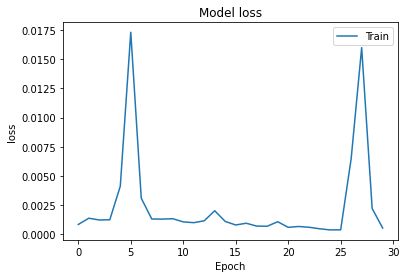

In [22]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()